# Lesson 2

In this lesson we will use all the calculus and linear algebra we learnt in Lesson 1 and use it build a simple linear model. To do that we'll need some data. So first, we'll import the packages we'll need and the first dataset we're going to be working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# OLS Regression

## Power plant output dataset - exploratory data analysis

The data in the file power_plant_output.csv in the github repository contains measurements of the power output from electricity generation plants. The power (PE) is generated from a combination of gas turbines, steam turbines, and heat recovery steam generators, and so is affected by environmental factors in which the turbines operate, such as the ambient temperature (AT) and the steam turbine exhaust vacuum level (V). The dataset consists of 9568 observations of the PE, AT and V values. The data is a subset of the publicly available dataset held in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). The original data can be found at [Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant). 

In [2]:
# Read in the raw data
df = pd.read_csv("./power_plant_output.csv")

We'll take a quick look at the data. First we'll look at a few rows of data

In [3]:
# Look at the first 10 rows
df.head(10)

,AT,V,PE
0,14.96,41.76,463.26
1,25.18,62.96,444.37
2,5.11,39.40,488.56
3,20.86,57.32,446.48
4,10.82,37.50,473.90
5,26.27,59.44,443.67
6,15.89,43.96,467.35
7,9.48,44.71,478.42
8,14.64,45.00,475.98
9,11.74,43.56,477.50


Next we'll look at summary statistics for the data. We'll use the pandas in-built describe function for this.

In [4]:
# Use pd.describe() to get the summary statistics of the data
df.describe()

,AT,V,PE
count,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,454.365009
std,7.452473,12.707893,17.066995
min,1.810000,25.360000,420.260000
25%,13.510000,41.740000,439.750000
50%,20.345000,52.080000,451.550000
75%,25.720000,66.540000,468.430000
max,37.110000,81.560000,495.760000


We'll check to see if any of the columns have missing values

In [5]:
df.isna().sum(axis = 0)

AT    0
V     0
PE    0
dtype: int64

Next we'll do a quick visual inspection of the relationships between the response variable, PE, and the various features. We'll do that simply through a series of scatter plots.

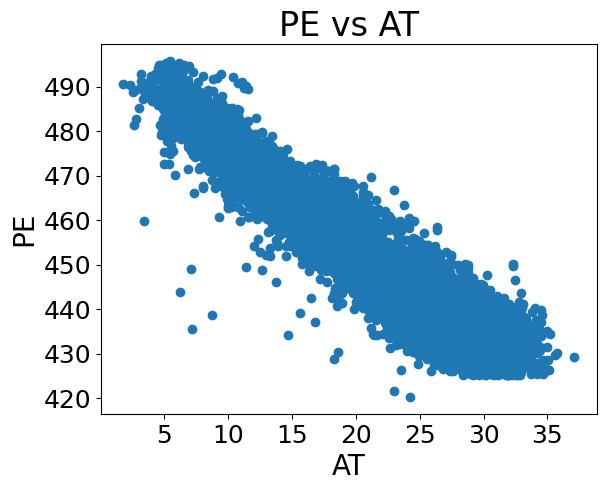

In [6]:
# Scatterplot between the response variable PE and the AT feature.
# The linear relationship is clear.
plt.scatter(df.AT, df.PE)
plt.title('PE vs AT', fontsize=24)
plt.xlabel('AT', fontsize=20)
plt.ylabel('PE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

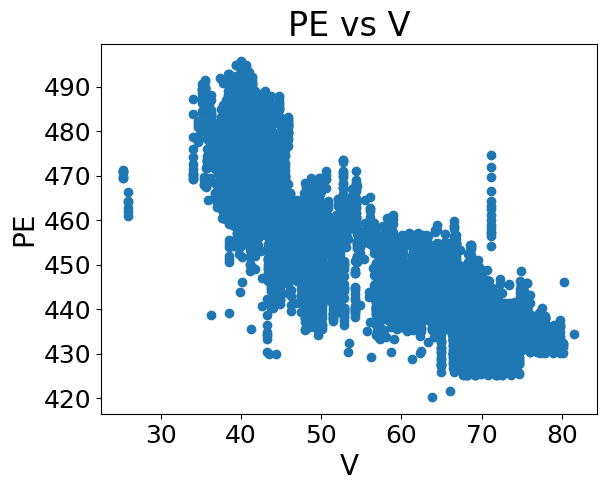

In [7]:
# Scatterplot between the response variable PE and the V feature.
# The linear relationship is clear, but not as strong as the relationship with the AT feature.
plt.scatter(df.V, df.PE)
plt.title('PE vs V', fontsize=24)
plt.xlabel('V', fontsize=20)
plt.ylabel('PE', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

## OLS regression via direction solution

We'll build a linear model of the PE response variable, using both features (AT, V). The model we are fitting has the form $PE = \beta_{0} + \beta_{AT}AT + \beta_{V}V$. We'll do the OLS fitting explicitly using the matrix operations outlined in the slides. We'll make use of the linear algebra functions of NumPy. First we need to extract the design matrix and vector of response values from the pandas dataframe.

In [8]:
# We extract the design matrix as a 2D numpy array. This initially corresponds to the feature columns of the dataframe.
# In this case it is all but the last column
X = df.iloc[:, 0:(df.shape[1]-1)].to_numpy()

In [9]:
# Now we'll add a column of ones to the design matrix.
# This is the feature that corresponds to the intercept parameter in the moddel
X = np.c_[np.ones(X.shape[0]), X]

In [10]:
# For convenience, we'll create and store the transpose of the design matrix
xT = np.transpose(X)

In [11]:
# Now we'll extract the response vector to a numpy array
y = df.iloc[:, df.shape[1]-1].to_numpy()

Now we can calculate the OLS parameter values using the formula $\hat{\underline{\beta}} = \left ( \underline{\underline{X}}^{\top} \underline{\underline{X}}\right )^{-1} \underline{\underline{X}}^{\top} \underline{y}$

In [12]:
# Calculate the inverse of xTx using the numpy linear algebra functions
xTx_inv = np.linalg.inv(np.matmul(xT, X))

In [13]:
# Finally calculate the OLS model parameter estimates using the formula (xTx_inv)*(xT*y).
# Again, we use the numpy linear algebra functions to do this
ols_params = np.matmul(xTx_inv, np.matmul(xT, y))

We can take a look at the estimated model parameters

In [14]:
ols_params

array([ 5.05477434e+02, -1.70426591e+00, -3.24486516e-01])

We can see that the estimated intercept is approximately 505, whilst both the effect of the AT and V variable are negative, i.e. they reduce the power output. This is as expected from our initial plots of the data.

## OLS regression via statsmodels package

Now we'll repeat the model fitting, but we'll use the statsmodels package to do the OLS regression for us directly. We'lluse the statsmodels formula interface. This is because the statistical formula we specifiy is close in form to the mathematical form we would write down on paper, whilst for the standard interface to statsmodels it is less clear how the mathematical formula manifests itself in the code. The statistical formula is $PE\;\sim\; AT + V$. For now we don't worry about the meaning of the symbol $\sim$. For now, we can think of this as the statistical formula equivalent of writing the mathematical formula $PE = \beta_{0} + \beta_{AT}AT + \beta_{V}V$. Note that in the statistical formula it looks like we have forgotten about the intercept. Fear not, the statistical model form will automatically assume we want an intercept included in our model and will add it for us, so we don't need to explicitly specify one in the statistical formula.

We'll use the statsmodels.formula.api.ols function to create and fit our OLS model.

In [15]:
# First we specify the model using statsmodels.formula.api.ols
model = smf.ols(formula='PE ~ AT + V', data=df)

In [16]:
# Now we fit the model to the data, i.e. we minimize the sum-of-squared residuals with respect to the model parameters
model_result = model.fit()

In [17]:
# Now we'll look at a summary of the fitted OLS model
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:32:07   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.000     505.006     505.949
AT            -1.7043      0.013   -134.429      0.000      -1.729      -1.679
V             -0.3245      0.007    -43.644      0.000      -0.339      -0.310
==============================================================================
Omnibus:                      526.355   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.669
Skew:                          -0.198   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's compare the model parameter estimates from the statsmodels ols function and our explicit ols calculation.

In [18]:
# Now compare the parameter estimates from the explicit calculation with those obtained from the statsmodels fit
df_compare = pd.DataFrame({'statsmodels': model_result.params, 'explicit_ols':ols_params})
df_compare

,statsmodels,explicit_ols
Intercept,505.477434,505.477434
AT,-1.704266,-1.704266
V,-0.324487,-0.324487


# Simple gradient descent example

Here we will use the gradient descent example shown in the slides and also shown in the figure below, which shows 3 values of the parameter $\beta$ in a simple linear model $y = \beta x$, that we get from 3 iterations of the gradient descent process. The training data for this example has been simulated (by me) and so we know the true value of $\beta$ that was used to produce the simulated data. We would expect the estimate of $\beta$ that minimizes the risk function to be close to the true value. From the figure below you can probably guess that the true value of $\beta$ used to produce the simulated data is $\beta=3.5$. 

<img src="GradientDescentExample.png" width="500">
<div style="text-align: center;">
<figcaption>Simple gradient descent example.</figcaption>
</div>

To start our simple gradient descent example, we read in the training data, which is held in the file gradient_descent_example.csv of the github repository.

In [19]:
# Read in the raw data
df_risk = pd.read_csv("./gradient_descent_example.csv")

# Extract the feature and response values to 
# numpy arrays
x=df_risk['x'].to_numpy()
y=df_risk['y'].to_numpy()

We then define two functions. The first function calculates the risk function that we are minimizing to fit the model. In this case we use the squared-loss based risk function that we introduced in the slides.

The second function we define is the derivative of the risk function with respect to the (single) model parameter. This function allows us to compute the size of the update (adjustment) to the model parameter after each iteration.

In [20]:
# Define functions for performing gradient descent

def risk(x, y, beta):
    '''
    Function to compute the empirical risk
    
    :param x: The feature values for our example
    :type x: A 1D numpy array
    
    :param y: The response values for our example
    :type y: A 1D numpy array
    
    :param beta: The model parameter value at which we want to 
                 evaluate the empirical risk
    :type beta: float
    
    :return: The empirical risk function value
    :rtype: float
    '''
    # Initialize the risk value
    risk = 0.0
  
    # Loop over the data and increment the risk with 
    # a squared-loss
    for i in range(x.shape[0]):
        risk += np.power(y[i]-(beta*x[i]), 2.0)
        
    risk /= x.shape[0]
  
    return risk


def derivative_risk(x, y, beta):
    '''
    Function to compute the derivative of the empirical risk
    with respect to the model parameter
    
    :param x: The feature values for our example
    :type x: A 1D numpy array
    
    :param y: The response values for our example
    :type y: A 1D numpy array
    
    :param beta: The model parameter value at which we want to 
                 evaluate the empirical risk
    :type beta: float
    
    :return: The derivative of the empirical risk function
    :rtype: float
    '''
    derivative_risk = 0.0
  
    for i in range(x.shape[0]):
        derivative_risk += - (2.0*x[i]*(y[i]-(beta*x[i])))

    derivative_risk /= x.shape[0]
    
    return derivative_risk   

Now we run the gradient descent algorithm for 20 iterations, using a learning rate of $\eta=0.05$. We will store the value of the parameter estimate at each iteration to show later how the parameter estimate has converged to its final value.

In [21]:
# Set the learning rate and the number of iterations we want to perform
eta=0.05
n_iter=20

# Initialize arrays to hold the sequence of 
# parameter estimates and empirical risk values
beta_learn=np.full(1+n_iter, np.nan)
risk_learn=np.full(1+n_iter, np.nan)

# Set the starting estimate for the
# model parameter
beta_learn[0]=1.0
risk_learn[0] = risk(x,y,beta_learn[0])

# Iterate using the gradient descent update rule
for iter in range(n_iter):
    beta_learn[iter+1] = beta_learn[iter]
    beta_learn[iter+1] -= (eta*derivative_risk(x,y,beta_learn[iter]))
    risk_learn[iter+1] = risk(x,y,beta_learn[iter+1])

Now we can plot how the model parameter estimate changed as we iterated the gradient descent algorithm

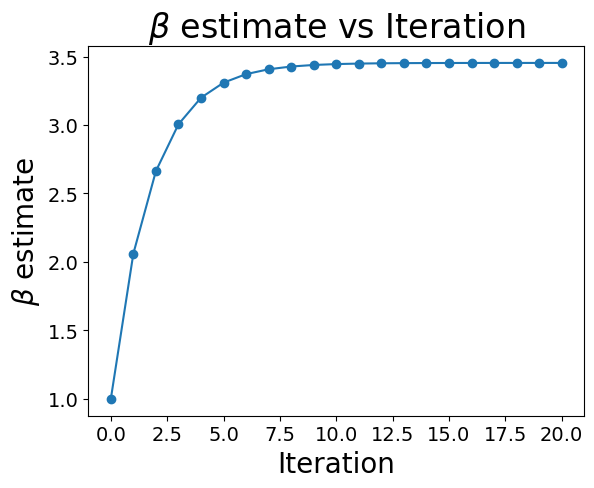

In [22]:
# Plot parameter estimates at each iteration
plt.plot(beta_learn, marker="o")
plt.title(r'$\beta$ estimate vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel(r'$\beta$ estimate', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Let's manually inspect the parameter estimate as we iterated through the gradient descent algorithm

In [23]:
# Let's look at the parameter estimates
beta_learn

array([1.        , 2.06152634, 2.66376678, 3.00543851, 3.19928064,
       3.30925395, 3.3716456 , 3.40704253, 3.42712442, 3.43851758,
       3.4449813 , 3.4486484 , 3.45072887, 3.45190919, 3.45257882,
       3.45295873, 3.45317427, 3.45329655, 3.45336592, 3.45340528,
       3.45342761])

The parameter estimate converges to approximately $\beta \simeq 3.453$. This is not the same as the true value of the parameter that was used to generate the data because there is noise that I added to the training data.

We can also plot how the risk function changed as we iterated the gradient descent algorithm, to see that that converges to a minimum value.

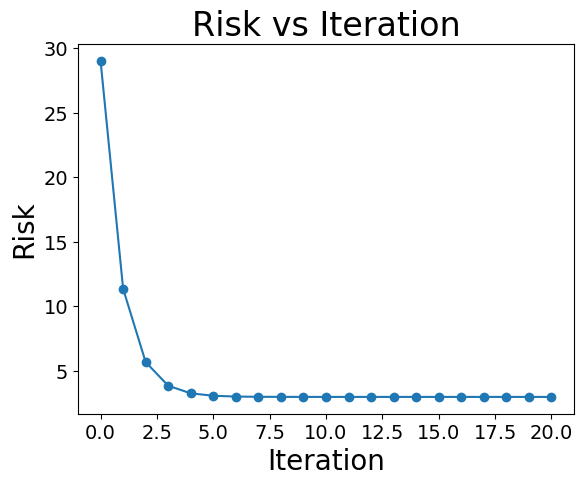

In [24]:
# Plot risk function values at each iteration
plt.plot(risk_learn, marker="o")
plt.title('Risk vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Risk', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [25]:
# Look at the risk function values
risk_learn

array([29.02667015, 11.36534752,  5.68072681,  3.85102735,  3.26210501,
        3.07254955,  3.01153764,  2.99189984,  2.98557906,  2.9835446 ,
        2.98288977,  2.982679  ,  2.98261116,  2.98258932,  2.9825823 ,
        2.98258003,  2.98257931,  2.98257907,  2.982579  ,  2.98257897,
        2.98257896])

## Gradient Descent for Power Plant Dataset

As a final exercise to test our understanding of what we have learnt about OLS regression and gradient descent, we'll now use gradient descent to build the linear model for the power plant output to show that we get the same parameter values as we do when we do explicit closed-form OLS regression.

This exercise was not covered in the tutorial slides. It is intended as an extra 'guided' exercise for the student. Follow along with the code and text below, or if you are feeling confident attempt it yourself first and then compare your output/answers to what I have given below.

### Transforming the model

The model we want to build is $PE = \beta_{0} + \beta_{AT}AT + \beta_{V}V$. For simplicity we'll still use a single learning rate $\eta$ even though we have more than one feature now. However, because the steepness of the risk-function surface may be different in the different feature directions, we'll need to transform the problem first to make it more suitable for using a single learning rate. In this case we will standardize both the response (target) variable $PE$ and the feature variables $AT, V$. To do this we subtract off the mean from each variable and divide by its standard deviation. That is, we create normalied variables as follows,

$PE_{norm} = \frac{PE- m_{PE}}{s_{PE}}\;\;\;\;,\;\; AT_{norm} = \frac{AT - m_{AT}}{s_{AT}}\;\;\;,\;\;V_{norm} = \frac{V - m_{V}}{s_V}$

Here $m_{x}$ is the sample mean of the variable $x$, and $s_{x}$ is the sample standard deviation of the variable $x$.

By construction, the new variables $AT_{norm}$, $V_{norm}$ and $PE_{norm}$ all have zero sample mean and sample variance of 1. The new feature variables $AT_{norm}$ and $V_{norm}$ are on the same scale and so it will now be easier to fit a model via gradient descent with a common learning rate using these transformed variables. 

However, we now have a problem. What we wanted was parameter estimates for a linear model constructed using the variables $PE, AT$, and $V$. What we are about to do is get parameter estimates for a new linear model constructed using the variables $PE_{norm}, AT_{norm}$, and $V_{norm}$. Somehow we need to relate our new model to our original model. We will do that next. 

### Relating the new model to the original model
Now, we can write our original model as,

$\begin{array}{ll}
PE & = &\beta_{0} + \beta_{AT}AT + \beta_{V}V \\
   & = &\beta_{0} + \beta_{AT}s_{AT}\left ( \frac{AT - m_{AT}}{s_{AT}}\right ) + \beta_{AT}m_{AT}\;+\;  \beta_{V}s_{V}\left ( \frac{V - m_{V}}{s_V}\right ) + \beta_{V}m_{V} 
\end{array}$

Since we can write $PE = PE_{norm}s_{PE} + m_{PE}$ we can re-arrange the last line of the equation for $PE$ above to write,

$\begin{array}{ll}
PE_{norm} & = & \frac{1}{s_{PE}}\left [ \beta_{0} + \beta_{AT}m_{AT} + \beta_{V}m_{V} - m_{PE}\right ] \;+\; \tilde{\beta}_{AT}AT_{norm}\;+\; \tilde{\beta}_{V}V_{norm}\\
& = & \tilde{\beta}_{0} \;+\; \tilde{\beta}_{AT}AT_{norm}\;+\; \tilde{\beta}_{V}V_{norm}
\end{array}$

In the equation above we have introduced two modified parameters $\tilde{\beta}_{AT} = \beta_{AT}\frac{s_{AT}}{s_{PE}}$ and $\tilde{\beta}_{V} = \beta_{V}\frac{s_{V}}{s_{PE}}$.

Since the new variables $AT_{norm}$, $V_{norm}$ and $PE_{norm}$ all have zero sample mean we don't need any intercept term in a linear model of $PE_{norm}$ when we model in terms of $AT_{norm}$ and $V_{norm}$. Looking at the last equation above, that tells us that we have $\tilde{\beta}_{0} = \beta_{0} + \beta_{AT}m_{AT} + \beta_{V}m_{V} - m_{PE} = 0$. 

So, if we build a linear model $PE_{norm} = \tilde{\beta}_{AT}AT_{norm}\;+\; \tilde{\beta}_{V}V_{norm}$, we can calculate the value of $\beta_{0}$ in the model $PE = \beta_{0} + \beta_{AT}AT\;+\; \beta_{V}V$ through $\beta_{0} = m_{PE} - \beta_{AT}m_{AT} - \beta_{V}m_{V}$. We can also calculate the original parameter values $\beta_{AT}$ and $\beta_{V}$ via $\beta_{AT} = \tilde{\beta}_{AT}\frac{s_{PE}}{s_{AT}}$ and $\beta_{V} = \tilde{\beta}_{V}\frac{s_{PE}}{s_{V}}$. Combining these relations we have $\beta_{0} = m_{PE} - \tilde{\beta}_{AT}m_{AT}\frac{s_{PE}}{s_{AT}} - \tilde{\beta}_{V}m_{V}\frac{s_{PE}}{s_{V}}$.

We now have all the components in place to relate our new model to our original model. To summarize:

1. We fit the model $PE_{norm} = \tilde{\beta}_{AT}AT_{norm}\;+\; \tilde{\beta}_{V}V_{norm}$
2. We calculate,

    a. $\beta_{0} = m_{PE} - \tilde{\beta}_{AT}m_{AT}\frac{s_{PE}}{s_{AT}} - \tilde{\beta}_{V}m_{V}\frac{s_{PE}}{s_{V}}$
    
    b. $\beta_{AT} = \tilde{\beta}_{AT}\frac{s_{PE}}{s_{AT}}$
    
    c. $\beta_{V} = \tilde{\beta}_{V}\frac{s_{PE}}{s_{V}}$

### Gradient descent update calculations

We need to define Python functions to calculate the empirical risk and its derivatives with respect to model parameters for a generic model of the form $\hat{\underline{y}} = \underline{\underline{X}}\,\underline{\beta}$. Again, we use a squared-loss loss-function because we are wanting to perform OLS regression (but via gradient descent). We will calculate the empirical risk and its derivatives in terms of the vector of residuals. Specifically, we have,

$\hat{\underline{y}} = \underline{\underline{X}}\,\underline{\beta}$

${\mathrm{Residuals}}\; \underline{r} = \underline{y} - \underline{\underline{X}}\,\underline{\beta}$

${\mathrm{Risk}} = \frac{1}{N}\underline{r}^{\top}\underline{r}$

$\frac{d {\mathrm{Risk}}}{d\underline{\beta}} = -\frac{2}{N}\underline{r}^{\top} \underline{\underline{X}}$

Since both the risk and its derivative vector can be calculated from the residual vector $\underline{r}$ we'll write a single Python function that computes both the risk and derivatives. That way we only need to compute the residual vector once. Again, we can do all our vector and matrix calculations using NumPy functions.

In [26]:
# Define functions for performing gradient descent

def ols_risk_and_derivative(X, y, beta):
    '''
    Function to compute the empirical risk for 
    a squared-loss function, and its derivative 
    with respect to the model parameters
    
    :param X: The feature matrix for our example
    :type X: A 2D numpy array
    
    :param y: The response values for our example
    :type y: A 1D numpy array
    
    :param beta: The model parameter vector at which we want to 
                 evaluate the empirical risk
    :type beta: A 1D numpy array
    
    :return: The empirical risk function value and its derivative vector
    :rtype: A tuple consisting of the risk value and 
            a 1D numpy array of the derivatives with respect 
            to the model parameters
    '''
  
    # Calculate the residuals vector
    residuals = y - np.matmul(X, beta)

    # Calculate the sum of the squared residuals.
    # We'll use the numpy inner product function to do this
    risk = np.inner(residuals, residuals) 
    risk /= X.shape[0]
    
    # Calculate the derivative of the empirical risk with respect
    # to the vector of model parameters
    risk_derivative = -2.0*np.matmul(residuals, X)/X.shape[0]
  
    return risk, risk_derivative

We're now ready to perform gradient descent for our power plant dataset. We'll need to read the data in again.

In [27]:
# Read in the raw data
df = pd.read_csv("./power_plant_output.csv")

In [28]:
# We extract the design matrix as a 2D numpy array. This initially corresponds to the feature columns of the dataframe.
# In this case it is all but the last column
X = df.iloc[:, 0:(df.shape[1]-1)].to_numpy()

# Now we'll extract the response vector to a numpy array
y = df.iloc[:, df.shape[1]-1].to_numpy()

Now we'll construct the standardized variables. We'll store the sample means and sample standard deviations of the original variables because we'll need them later on

In [29]:
# Calculate sample means
mean_y = np.mean(y)
mean_X = np.mean(X, axis=0)

# Calculate sample standard deviations
sd_y = np.std(y)
sd_X = np.std(X, axis=0)

# Calculate the standardized variables
y_norm = (y-mean_y)/sd_y
X_norm = (X - mean_X)/sd_X

Now for the gradient descent loop, applied to the standardized data. We'll use a larger learning rate than before, $\eta=0.2$, and run the gradient descent algorithm for 400 iterations.

We'll also modify the learning rate, so that if the derivative $\frac{d{\mathrm Risk}}{d\underline{\beta}}$ is too big in magnitude we don't make too big a change to our current estimate of $\underline{\beta}$. We do this by normalizing the learning rate by the magnitude of $\frac{d{\mathrm Risk}}{d\underline{\beta}}$. That is, we'll use an overall learning rate of,

$$\frac{\eta}{\left | \frac{d{\mathrm Risk}}{d\underline{\beta}} \right |}$$

We can use the inner product function to calculate $\left | \frac{d{\mathrm Risk}}{d\underline{\beta}} \right |$.

However, now we have the problem that if $\left | \frac{d{\mathrm Risk}}{d\underline{\beta}} \right |$ is small our effective learning rate will be large and will diverge as $\left | \frac{d{\mathrm Risk}}{d\underline{\beta}} \right |$ tends to zero at the minimum of the risk function. So we'll add in a constant into the denominator of our overall learning rate. The overall learning we'll use is,

$$\frac{\eta}{\sqrt{ 1 + \left | \frac{d{\mathrm Risk}}{d\underline{\beta}} \right |^{2}}}$$


In [30]:
# Set the learning rate and the number of iterations we want to perform
eta=0.2
n_iter=400

# Initialize arrays to hold the sequence of 
# parameter estimates and empirical risk values.
# We'll include a subscript 'pe' in the output 
# variable names, to disinguish from our other 
# gradient descent example
beta_learn_pe=np.full((1+n_iter, 2), np.nan)
risk_learn_pe=np.full(1+n_iter, np.nan)

# Set the starting estimate for the
# model parameters. We set them both to -1 to start
# with because we know from our exploratory plots earlier
# that both AT and V have a negative effect on the power plant
# output.
beta_learn_pe[0] = np.array([-1.0, -1.0])

# Calculate the initial risk value
risk_learn_pe[0], _ = ols_risk_and_derivative(X=X_norm, y=y_norm, beta=beta_learn_pe[0])

# Iterate using the gradient descent update rule
for iter in range(n_iter):
    beta_learn_pe[iter+1] = beta_learn_pe[iter]
    risk, risk_derivative = ols_risk_and_derivative(X=X_norm, y=y_norm, beta=beta_learn_pe[iter+1])
    
    beta_learn_pe[iter+1] -= eta*risk_derivative / np.sqrt(1.0 + np.inner(risk_derivative, risk_derivative))
    risk_learn_pe[iter+1] = risk

Let's look at the trajectory of the risk values we got as we iterated our gradient descent algorithm. This is to check that the risk value did decrease as we iterated and that it approached a stable value, indicating that we have found at least a local minimm of the empirical risk function.

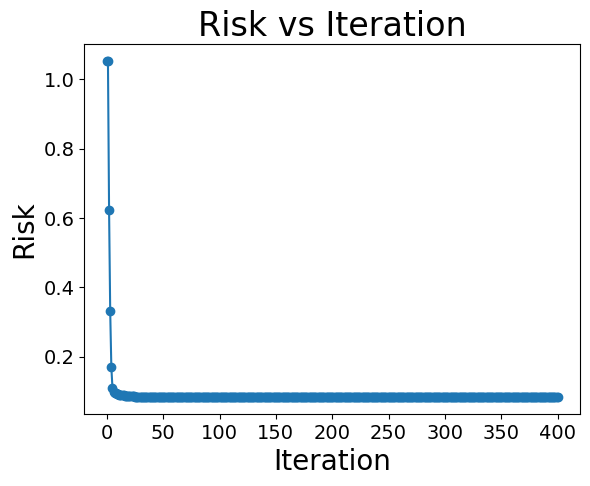

In [31]:
# Plot risk function values at each iteration
plt.plot(risk_learn_pe, marker="o")
plt.title('Risk vs Iteration', fontsize=24)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Risk', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The trajectory of risk values looks pretty good. We have found a minimum of the empirical risk.

Now we can look at the parameter estimates we got for our original model form, by using the values of our parameter estimates at the last iteration and by using the transformation formulae we derived a moment ago. We can compare the OLS model parameters we obtained via gradient descent to those we previously obtained from using the statsmodels package and those we obtained from direct calculation.

In [32]:
# Calculate the intercept parameter of the original model form
intercept_gradient_descent = mean_y - (beta_learn_pe[n_iter, 0]*mean_X[0]*sd_y/sd_X[0]) - (beta_learn_pe[n_iter, 1]*mean_X[1]*sd_y/sd_X[1])

# Calculate the AT parameter of the original model form
beta_AT_gradient_descent = beta_learn_pe[n_iter, 0]*sd_y/sd_X[0]

# Calculate the V parameter of the original model form
beta_V_gradient_descent = beta_learn_pe[n_iter, 1]*sd_y/sd_X[1]

# Put all the parameters in a single array, for convenience
ols_gradient_descent = np.array([intercept_gradient_descent,
                                 beta_AT_gradient_descent,
                                 beta_V_gradient_descent])

In [33]:
# Now compare the gradient descent parameter estimates with those from the
# explicit calculation and those obtained from the statsmodels fit
df_compare2 = pd.DataFrame({'statsmodels':model_result.params,
                           'explicit_ols':ols_params,
                           'gradient_descent':ols_gradient_descent})
df_compare2

,statsmodels,explicit_ols,gradient_descent
Intercept,505.477434,505.477434,505.477434
AT,-1.704266,-1.704266,-1.704266
V,-0.324487,-0.324487,-0.324487


You can see that we get the same model parameter estimates from the gradient descent algorithm as we do when we use direct closed-form calculation (either from our own code or from the statsmodels package). However, the advantage of gradient descent is we can apply the principle to any loss function. We simply change the code in the functions that calculate the risk and its derivatives. 